# Welcome to Colab!

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the file
df=pd.read_csv('weatherprediction.csv')
df.head(5)

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB


In [4]:
df.describe()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,22.581725,64.347094,9.906255,49.658104,1014.312336
std,7.326996,19.954739,5.780316,29.123104,20.196433
min,10.001842,30.005071,0.009819,0.015038,980.014486
25%,16.359398,47.339815,4.761909,23.900016,996.938630
50%,22.536448,63.920797,9.908572,49.488284,1013.433035
75%,28.976476,81.561021,14.948408,75.324140,1031.735067
max,34.995214,99.997481,19.999132,99.997795,1049.985593


In [6]:
# Get the shape of the file
df.rename(columns={
    'Wind_Speed': 'Wind Speed',
    'Cloud_Cover': 'Cloud Cover'
}, inplace=True)

# Display head(4)
df.head(4)

,Temperature,Humidity,Wind Speed,Cloud Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain


In [10]:
#Descriptive Analysis (Summary Statistics for numerical columns)
print("--- Descriptive Analysis ---")
print(df.describe())

--- Descriptive Analysis ---
       Temperature     Humidity   Wind Speed  Cloud Cover     Pressure
count  2500.000000  2500.000000  2500.000000  2500.000000  2500.000000
mean     22.581725    64.347094     9.906255    49.658104  1014.312336
std       7.326996    19.954739     5.780316    29.123104    20.196433
min      10.001842    30.005071     0.009819     0.015038   980.014486
25%      16.359398    47.339815     4.761909    23.900016   996.938630
50%      22.536448    63.920797     9.908572    49.488284  1013.433035
75%      28.976476    81.561021    14.948408    75.324140  1031.735067
max      34.995214    99.997481    19.999132    99.997795  1049.985593


In [11]:
#Aggregate Analysis (Mean values grouped by 'Rain' status)
print("\n--- Aggregate Analysis (Mean by Rain status) ---")
print(df.groupby('Rain').mean())


--- Aggregate Analysis (Mean by Rain status) ---
         Temperature   Humidity  Wind Speed  Cloud Cover     Pressure
Rain                                                                 
no rain    23.319913  61.455151    9.909297    46.058162  1014.249021
rain       17.442619  84.480176    9.885073    74.720123  1014.753118


In [14]:
#Frequency Count for the categorical column 'Rain'
print("\n--- Rain Frequency Counts ---")
print(df['Rain'].value_counts())



--- Rain Frequency Counts ---
Rain
no rain    2186
rain        314
Name: count, dtype: int64


In [15]:
# Filter days where Temperature > 30 and Humidity > 80
hot_and_humid = df[(df['Temperature'] > 30) & (df['Humidity'] > 80)]
print(hot_and_humid.head())

    Temperature   Humidity  Wind Speed  Cloud Cover     Pressure     Rain
13    33.139916  90.326477    5.771774    99.910178   987.803792  no rain
38    33.593702  88.375427    2.474867    62.642425  1036.823648  no rain
52    34.709346  91.867781    9.922193    44.541332  1043.419930  no rain
72    34.419027  96.098187    2.715320    71.006281   985.048682  no rain
98    30.723501  84.868568    9.870131     5.604314   988.666424  no rain


In [19]:
# Correlation matrix for numerical columns
correlation = df.drop(columns=['Rain']).corr()
print(correlation)

             Temperature  Humidity  Wind Speed  Cloud Cover  Pressure
Temperature     1.000000 -0.014119   -0.004957     0.006632 -0.007489
Humidity       -0.014119  1.000000    0.003816     0.007244 -0.032089
Wind Speed     -0.004957  0.003816    1.000000    -0.000405  0.018772
Cloud Cover     0.006632  0.007244   -0.000405     1.000000  0.023100
Pressure       -0.007489 -0.032089    0.018772     0.023100  1.000000


In [20]:
# Get the average of all metrics for Rain vs No Rain
avg_conditions = df.groupby('Rain').agg(['mean', 'std'])
print(avg_conditions)

        Temperature             Humidity            Wind Speed            \
               mean       std       mean        std       mean       std   
Rain                                                                       
no rain   23.319913  7.376748  61.455151  19.444223   9.909297  5.760907   
rain      17.442619  4.295249  84.480176   8.650383   9.885073  5.923008   

        Cloud Cover                Pressure             
               mean        std         mean        std  
Rain                                                    
no rain   46.058162  28.917962  1014.249021  20.137445  
rain      74.720123  14.606900  1014.753118  20.629713  


In [21]:
# Calculate the percentage of rainy vs non-rainy days
rain_dist = df['Rain'].value_counts(normalize=True) * 100
print(rain_dist)

Rain
no rain    87.44
rain       12.56
Name: proportion, dtype: float64


Text(0.5, 0, 'Temperature (°C)')

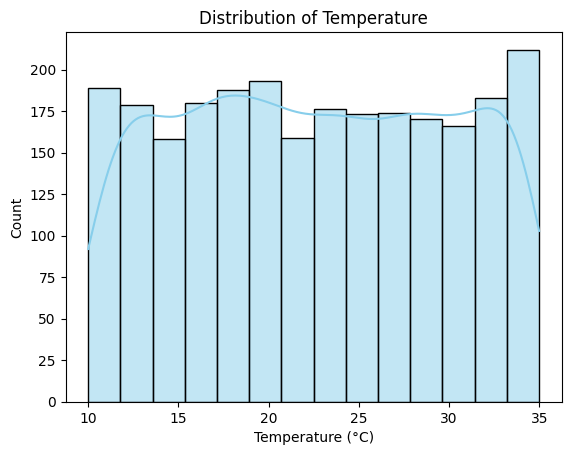

In [22]:
# Distribution of Temperature
sns.histplot(df['Temperature'], kde=True, color='skyblue')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°C)')

/tmp/ipython-input-1992292243.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rain_counts.index, y=rain_counts.values, palette='viridis')


Text(0, 0.5, 'Count')

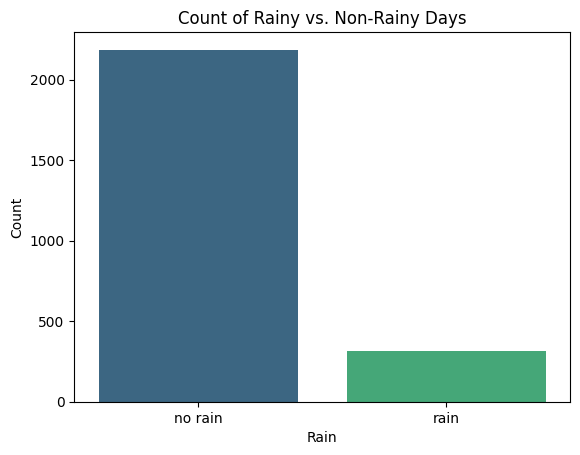

In [23]:
# Count of Rain categories
rain_counts = df['Rain'].value_counts().sort_values(ascending=False)
sns.barplot(x=rain_counts.index, y=rain_counts.values, palette='viridis')
plt.title('Count of Rainy vs. Non-Rainy Days')
plt.ylabel('Count')

Text(0.5, 1.0, 'Relationship: Temperature vs. Humidity')

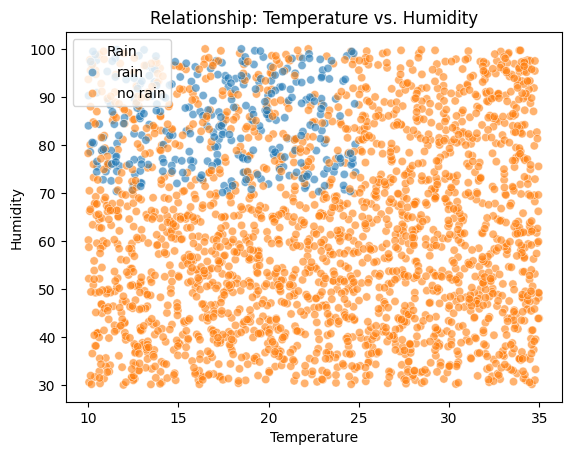

In [24]:
# Temperature vs. Humidity
sns.scatterplot(x='Temperature', y='Humidity', hue='Rain', data=df, alpha=0.6)
plt.title('Relationship: Temperature vs. Humidity')

/tmp/ipython-input-452281426.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rain', y='Humidity', data=df, palette='Set2')


Text(0.5, 1.0, 'Humidity Comparison: Rain vs No Rain')

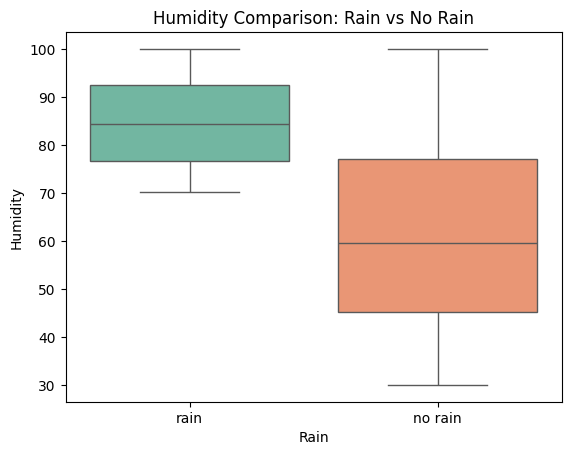

In [25]:
# Humidity Distribution by Rain Category
sns.boxplot(x='Rain', y='Humidity', data=df, palette='Set2')
plt.title('Humidity Comparison: Rain vs No Rain')